### Name: Bram Otten

### Student ID: 10992456

### Group: F

Please fill in you name, student ID and group above, and also edit the filename according to the specified format.

# Polynomial Regression and Cross Validation

For this assignment we will try to fit a polynomial function to a provided dataset. In total there are *15 points* available in the excersises below.

The material for this assignment is based on sections **2.6 - 2.8** and **4.6 - 4.8** of the book *[Introduction to Machine Learning](https://www.cmpe.boun.edu.tr/~ethem/i2ml3e/)* by Ethem Alpaydin. In addition, there will be links to videos from Andrew Ng's *[Machine Learning course on Coursera](https://www.coursera.org/learn/machine-learning)* to provide some extra explanations and help create some intuitions.

Generally speaking, using built-in functions will be fine for this course, but for this assignment you **may not** use any of the polynomial functions listed [here](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.poly1d.html) or other built-in polynomial solution methods. You can of course use them to check your own implementations work correctly.

Below are some imports to get your started. You do not need to add any code for this cell to work, just make sure you run the cell to actually import the libraries in your notebook.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Loading the data [0 pts]

Write a function to read the data stored in the file *points.csv* and convert it to a *Numpy* array. Each line in the file is a data point consisting of an **x**-value and **r**-value, separated by a comma. The task here is exactly the same as the loading the *Sudoku* puzzles from last week, so the function [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) should work fine. Test your function and print the resulting array to make sure you know what the data looks like.

In [2]:
def load_file(filename):
    return np.loadtxt(open(filename, 'r'),
                      delimiter=',')


pointsCSV = load_file('points.csv')
print(pointsCSV[0:3])

[[ -5.          42.02601552]
 [ -4.65517241  59.31942474]
 [ -4.31034483 -58.84315149]]


## Plotting the points [1 pt]

Write a function to separate your data into an X vector and a R vector using [slicing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html) like in last weeks assignment. Using both vectors, create a graph containing the plotted points you just read from the file. For this you can use the *matplotlib* functions [plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [show](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show). A plot of the data should be visble below your code.

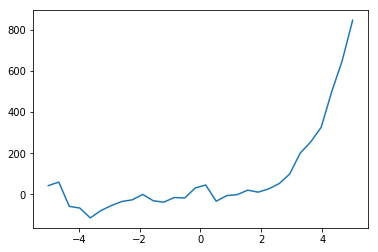

In [3]:
def split_X_R(data):
    # Insert exception handling here
    return data[:, 0], data[:, 1]


pcol0 = split_X_R(pointsCSV)[0]
pcol1 = split_X_R(pointsCSV)[1]
plt.show(plt.plot(pcol0, pcol1))

## Defining the linear model [1 pt]

Now we are going to try to find the function which best relates these points. We will start by fitting a simple linear function of the form

(2.15) $$g(x) = w_1x + w_0$$

* *For more detailed description of linear regression, you can watch Andrew's videos on the topic. The notation is slightly different, $y$ instead of $r$ for the output and $\theta$ instead of $w$ for the model parameters, but the actual model is identical.*
    * [Supervised Learning](https://www.youtube.com/watch?v=ls7Ke48jCt8&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=3)
    * [Linear Model](https://www.youtube.com/watch?v=PBZUjnGuXjA&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=5)

Now write a function that computes the predicted output value $g(x)$ given a value of $x$ and the parameters $w_0$ and $w_1$.

In [4]:
def linear_model(w0, w1, x):
    # Insert exception handling here
    return w1 * x + w0


print(linear_model(2, 4, 2))  # 4 * 2 + 2 = 10

10


## Creating the cost function [1 pt]

The cost function is defined as the sum of the squared errors of each prediction

(2.16) $$E(w_1, w_0|X) = \frac{1}{N}\sum^N_{t=1} [r^t - (w_1x^t + w_0)]^2$$

* *These videos are great for building intuition on the relation between the hypothesis function and the associated cost of that hypothesis for the data.*
    * [Cost function 1](https://www.youtube.com/watch?v=EANr4YttXIQ&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=6)
    * [Cost function 2](https://www.youtube.com/watch?v=J5vJFwQWOaY&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=7)

Write a function to compute the cost based on the dataset $X$, $R$ and parameters $w_0$ and $w_1$. Based on your plot of the data, try to estimate some sensible values for $w_0$ and $w_1$ and compute the corresponding cost. Try at least 3 different guesses and print their cost. Order the prints of your guesses from highest to lowest cost.

In [5]:
def linear_cost(w0, w1, X, R):
    # Insert exception handling here
    total = 0
    n = X.size
    for i in range(n):
        total += (R[i] - (w1 * X[i] + w0)) ** 2
    return total / n


print(round(linear_cost(0,
                        400,
                        pcol0,
                        pcol1), 2))

print(round(linear_cost(0,
                        0,
                        pcol0,
                        pcol1), 2))

print(round(linear_cost(10,
                        50,
                        pcol0,
                        pcol1), 2))

1108986.73
55279.42
29484.57


## Fitting the linear model [2 pt]

We can find the minimum value of the cost function by taking the partial derivatives for both of the weights $w_0$ and $w_1$ and setting them equal to $0$, resulting in the equations

(2.17a) $$w_1 = \frac{\sum_tx^tr^t - \bar{x}\bar{r}N}{\sum_t(x^t)^2 - N\bar{x}^2}$$
(2.17b) $$w_0 = \bar{r} - w_1\bar{x}$$

You can take the partial derivates of the cost function yourself to check you understand where these equations come from. Minimizing the cost function gives us the best possible parameters for a linear model predicting the values of the provided dataset.

Write a function which computes the optimal values of $w_0$ and $w_1$ for a dataset consisting of the vectors $X$ and $R$, containing $N$ elements each. Use *matplotlib* again to plot the points, but now also add the line representing the hypothesis function you found. As the line is linear, you can simply plot it by computing the 2 end points and have *matplotlib* draw the connecting line.

Note that with some clever [array operations](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) and [linear algebra](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) you can avoid explicitly looping over all the elements in $X$ and $R$ in `linear_fit`, which will make your code a lot faster. However, this is just an optional extra and any working implementation of the equations above will be considered correct.

g(x) = 85.87 + 52.14 * x


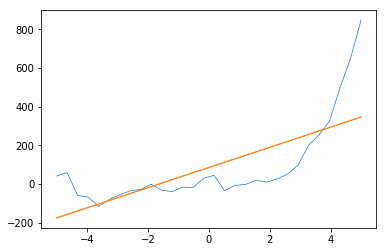

In [6]:
# todo: make smart
def linear_fit(X, R, N):
    # Insert exception handling
    xBar = rBar = 0.0
    for i in range(N):
        xBar += X[i]
        rBar += R[i]
    xBar /= N
    rBar /= N

    above = below = 0
    for i in range(N):
        above += X[i] * R[i] - xBar * rBar * N
        below += (X[i]) ** 2 - N * xBar ** 2
    w1 = above / below
    w0 = rBar - w1 * xBar
    return w0, w1


(pw0,
 pw1) = linear_fit(pcol0,
                   pcol1,
                   pcol0.size)

print("g(x) = {} + {} * x".format(round(pw0, 2),
                                  round(pw1, 2)))

x = [-5, 5]
y = [linear_model(pw0, pw1, x[0]),
     linear_model(pw0, pw1, x[1])]

plt.show(plt.plot(pcol0,
                  pcol1,
                  linewidth=0.7),
         plt.plot(x, y, linewidth=1.3))

## Polynomial data [1 pt]

The linear model can easily be extended to polynomials of any order by expanding the original input with the squared input $x^2$, the cubed input $x^3$, etc and adding additional weights to the model. For ease of calculation, the input is also expanded with a vector of $1$'s, to represent the input for the constant parameter $w_0$. The parameters then become $w_0$, $w_1$, $w_2$, etc., one factor for each term of the polynomial.

So if originally the dataset of $N$ elements is of the form $X$ (superscripts are indices here)

$$ X = \left[\begin{array}{c} x^1 \\ x^2 \\ \vdots \\ x^N \end{array} \right]$$

Then the matrix $D$ for a $k^{th}$-order polynomial becomes

$$ D = \left[\begin{array}{cccc}
1 & x^1 & (x^1)^2 & \cdots & (x^1)^k \\ 
1 & x^2 & (x^2)^2 & \cdots & (x^2)^k \\ 
\vdots \\
1 & x^N & (x^N)^2 & \cdots & (x^N)^k \\ 
\end{array} \right]$$

Write a function `create_D_matrix` that constructs this matrix for a given vector $X$ up the specified order $k$. Looking at plots for the dataset we have been using so far, the relationship between the points will probably be at least be quadratic. Use the function to construct a matrix $D$ of order $2$, print the matrix and verify that it looks correct.

In [7]:
def create_D_matrix(X, k=3):
    # Insert exception handling
    matrixD = []
    n = X.size
    for i in range(n):
        currentRow = []
        for j in range(k + 1):
            currentRow.append(X[i] ** j)
        matrixD.append(currentRow)
    return np.matrix(matrixD)


dk3 = create_D_matrix(pcol0)
print(dk3)

[[  1.00000000e+00  -5.00000000e+00   2.50000000e+01  -1.25000000e+02]
 [  1.00000000e+00  -4.65517241e+00   2.16706302e+01  -1.00880520e+02]
 [  1.00000000e+00  -4.31034483e+00   1.85790725e+01  -8.00822092e+01]
 [  1.00000000e+00  -3.96551724e+00   1.57253270e+01  -6.23590553e+01]
 [  1.00000000e+00  -3.62068966e+00   1.31093936e+01  -4.74650457e+01]
 [  1.00000000e+00  -3.27586207e+00   1.07312723e+01  -3.51541679e+01]
 [  1.00000000e+00  -2.93103448e+00   8.59096314e+00  -2.51804092e+01]
 [  1.00000000e+00  -2.58620690e+00   6.68846611e+00  -1.72977572e+01]
 [  1.00000000e+00  -2.24137931e+00   5.02378121e+00  -1.12601993e+01]
 [  1.00000000e+00  -1.89655172e+00   3.59690844e+00  -6.82172291e+00]
 [  1.00000000e+00  -1.55172414e+00   2.40784780e+00  -3.73631555e+00]
 [  1.00000000e+00  -1.20689655e+00   1.45659929e+00  -1.75796466e+00]
 [  1.00000000e+00  -8.62068966e-01   7.43162901e-01  -6.40657674e-01]
 [  1.00000000e+00  -5.17241379e-01   2.67538644e-01  -1.38382057e-01]
 [  1.

## Polynomial model [1 pt]

The parameters can now be represented as

$$ w = \left[\begin{array}{c} w_0 \\ w_1 \\ \vdots \\ w_k \end{array} \right]$$

The hypothesis for a single input then just becomes

$$ g(x^1) = \sum_{i=0}^k D^1_iw_i $$

Which can write as a matrix multiplication for all inputs in a single equation

$$ \left[\begin{array}{cccc}
1 & x^1 & (x^1)^2 & \cdots & (x^1)^k \\ 
1 & x^2 & (x^2)^2 & \cdots & (x^2)^k \\ 
\vdots \\
1 & x^N & (x^N)^2 & \cdots & (x^N)^k \\ 
\end{array} \right]
\left[\begin{array}{c} w_0 \\ w_1 \\ \vdots \\ w_k \end{array} \right] = \left[\begin{array}{c} g(x^1) \\ g(x^2) \\ \vdots \\ g(x^N) \end{array} \right]$$

You can do matrix multiplication using the [dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function. Write 2 functions for computing the polynomial below

* `poly_val` should take a single input value $x$ and a vector of polynomial weights $W$ and compute the single hypothesis value for that input.
* `poly_model` should take a matrix $D$ and weight vector $W$ and compute the corresponding vector of hypotheses. 


In [8]:
def poly_val(x, W):
    xRow = []
    for i in range(W.size):
        xRow.append(x ** i)
    return np.dot(xRow, W)


def poly_model(D, W):
    # Insert exception handling
    return np.dot(D, W)


exampleW = np.transpose(np.array([4, 2, 3]))
print(poly_val(3, exampleW))
print(poly_model(create_D_matrix(pcol0, exampleW.size - 1),
                 exampleW))

37
[[ 69.          59.70154578  51.11652794  43.24494649  36.08680143
   29.64209275  23.91082045  18.89298454  14.58858502  10.99762188
    8.12009512   5.95600476   4.50535077   3.76813317   3.74435196
    4.43400713   5.83709869   7.95362663  10.78359096  14.32699168
   18.58382878  23.55410226  29.23781213  35.63495838  42.74554102
   50.56956005  59.10701546  68.35790725  78.32223543  89.        ]]


## Polynomial cost function and model fitting [2 pts]

And for the cost function we can then use

$$ E(w|X) = \frac{1}{2N} \sum_{t=1}^N [r^t - D^tw]^2$$

Note this is the same mean squared error function as we used for the linear case. We compute the hypothesis $g(x)$ for every example with $D^tw$, take the difference with the actual output $r$ and finally square and sum each difference.

Now we have the cost function equation and can again take the partial derivative for each of the weights $w_0$ to $w_k$ and set their value equal to $0$. Solving the resulting system of equations will give the set of weights that minimize the cost function. The weights describing this lowest point of the cost function are the parameters which will produce the line that best fits our dataset.

Solving all partial derivate equations for each weight can actually be done with just a couple of matrix operations. Deriving the equation yourself can be a bit involved, but know that the principle is exactly the same as for the linear model computing just $w_0$ and $w_1$. The final equation for weight vector becomes

(4.33) $$ w = (D^TD)^{-1}D^Tr $$

Numpy has built in functions for [transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) and [inverse](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html). Write the code for the for the functions

* `poly_cost` should return the total cost $E$ given $w$, $D$ and $r$
* `poly_fit` should return the vector $w$ that bests fits the polynomial relationship between matrix $D$ and vector $r$

Using the quadratic matrix $D$ you constructed earlier and this `poly_fit` function, find the best fitting weights for a quadric polynomial and print these weights


In [9]:
def poly_cost(W, D, R):
    # Insert exception handling
    N = len(D)
    total = 0
    for i in range(N):
        total += (R[i] - poly_model(D[i], W)) ** 2

    return np.asscalar(total / (2 * N))


def poly_fit(D, R):
    DT = np.transpose(D)
    DTDi = np.linalg.inv(np.dot(DT, D))
    total = np.dot(DTDi, DT)
    total = np.dot(total, R)
    return np.transpose(total)


exampleW = np.transpose(np.array([4, 2, 3]))
print("Example cost:",
      poly_cost(exampleW,
                create_D_matrix(pcol0,
                                exampleW.size - 1),
                pcol1))

kSize = 2
D0K = create_D_matrix(pcol0, kSize)
WForPK = poly_fit(D0K, pcol1)

print("The function found for k =", kSize, "is:")
print("g(x) = {}x**2 + {}x + {}".format(np.asscalar(WForPK[0]),
                                        np.asscalar(WForPK[1]),
                                        np.asscalar(WForPK[2])))
print("Resulting in a cost of:",
      poly_cost(WForPK, D0K, pcol1))

Example cost: 21805.29114978263
The function found for k = 2 is:
g(x) = -56.87348684092678x**2 + 52.14107002009267x + 16.024393174835048
Resulting in a cost of: 3720.1749534442647


## Plotting polynomials [1 pt]

Now lets try and figure out what our quadratic polynomial actually looks like. As the function is not linear, we will need more than just 2 points to actually plot the line. The easiest solutions is to create a whole bunch of x-values as samples, compute the correspronding y-values and plot those. With enough samples the line will look smooth, even if it is connected with linear segments.

To create these x-values sample, we can use the function [linspace](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linspace.html). Then just use the `poly_val` function you wrote earlier and apply it to every x-value to compute the array of y-values. Now just plot the original datapoints as dots and the hypothesis as a line, just as for the linear plot. Don't forget to show your plot at the end.

Use these steps to fill in the `poly_plot` function below and show the polynomial function defined by the weights you found for the quadratic polynomial.

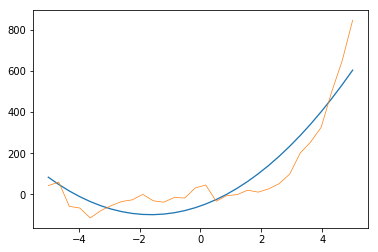

In [10]:
def poly_plot(W, X, R, steps=30):
    xList = []
    yList = []
    for i in np.linspace(-5, 5, steps):
        xList.append(i)
        # Insert exception handling
        yList.append(np.asscalar(poly_val(i, W)))
    plt.show(plt.plot(xList, yList, linewidth=1.3),
             plt.plot(X, R, linewidth=0.7))


poly_plot(WForPK, pcol0, pcol1)

## Polynomial order [1 pt]

Now you can create a polynomial fit on the data for a polynomial of any order. The next question then becomes: *What order polynomial fits the data the best?*

Using the `create_D_matrix`, `poly_fit` and `poly_plot`, try to fit different order polynomials to the data. Show the plot for the order polynomial you think fits best.

Note that the cost function will most likely decrease with each added polynomial term, as there is more flexibility in the model to fit the data points exactly. However, these weights will fit those few data points very well, but might have very extreme values in between points that would not be good predictors for new inputs. Something like a order 20 polynomial might have a very well fitting shape for the set of points, but looks like it would be strange predictor at some of the possible other points. Try to find a fit that looks visually like it would generalize to new points well.


k = 3 costs 1661.5808813269653 . Looks like:


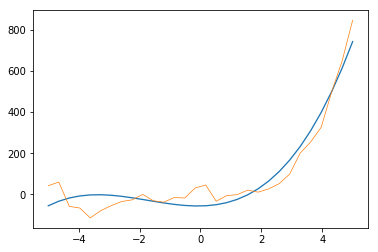

k = 4 costs 272.7961383781661 . Looks like:


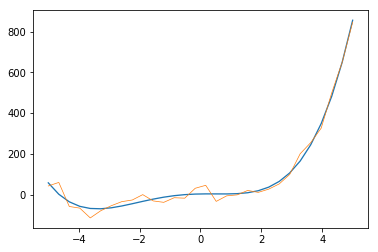

k = 5 costs 260.7883684797869 . Looks like:


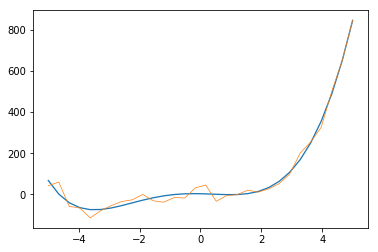

k = 8 costs 248.3638249765186 . Looks like:


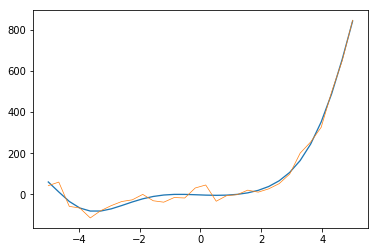

k = 16 costs 78.39099888374196 . Looks like:


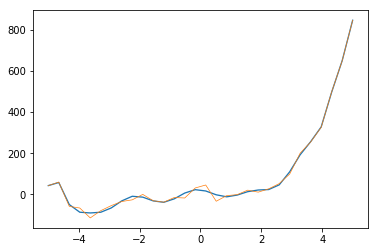

In [12]:
kList = [3, 4, 5, 8, 16]

# kList = [19, 20] # very weird

for kSize in kList:
    # Insert exception handling
    currentD = create_D_matrix(pcol0, kSize)
    currentW = poly_fit(currentD, pcol1)

    print("k =", kSize, "costs",
          poly_cost(currentW, currentD, pcol1),
          ". Looks like:")
    poly_plot(currentW, pcol0, pcol1)

# k = 4 looks pretty good.
# I won't make up a lambda for an augmented error function,
# but it's 0.17x as bad as k = 3, and only slightly worse
# than,for example, the more complex k = 5 and k = 8 (>1.1x as bad).

## Cross validation [1 pt]

Another way to answer this question is to use cross validation. With cross validation you split the data into 2 parts and use one part to fit the model (training set) and the other part to see how well the model fits the remaining data (validation set).

Write a function below to split the original dataset into 2 sets according to a given ratio. It is important to randomize your division, as simply using the first half of data for the one set and the second half for the other might result in strange distributions. You could use a function like [shuffle](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html) for this purpose.

Split the original dataset using a ratio of 0.6 into a training and a validation set. Then for both of these sets, use your old `split_X_R` function to split them into their $X$ and $R$ parts

In [13]:
# Insert exception handling
def validation_split(data, ratio=0.6):
    splitN = int(len(data) * ratio)
    np.random.shuffle(data)
    return data[:splitN, :], data[splitN:, :]


pointsCSVcopy = np.copy(pointsCSV)
givenSplit = validation_split(pointsCSVcopy)
(givenXT, givenRT) = split_X_R(givenSplit[0])
(givenXV, givenRV) = split_X_R(givenSplit[1])
# print(givenSplit)
print(givenXT)
# print(givenRT)
# print(givenXV)
# print(givenRV)

[-1.89655172  1.20689655  3.27586207  1.55172414 -4.31034483 -5.
  4.65517241 -2.93103448  2.93103448 -3.62068966 -2.24137931  0.86206897
  1.89655172 -0.86206897  3.62068966 -1.55172414  2.5862069  -0.17241379]


## Model selection [2 pt]

With this new split of the data you can just repeatedly fit different order polynomials to the training set and see which produces the lowest cost on the validation set. The set of weights with the lowests cost on the validation set generalizes the best to new data and is thus the best overal fit on the dataset.

Write the function `best_poly_fit` below. Try a large range of polynomial orders (like 1 to 50), create the $D$ matrix based on the training set for each order and fit the weights for that polynomial. Then for each of these found weights, also create the D matrix for the validation set and compute the cost using `poly_cost`. Return the set of weights with the lowest cost on the validation set.

Run this fitting function with your training and validation sets. Plot the hypothesis function and show the weights that were found. Note that rerunning your validation split code above will result in a different random distribution and thus a slightly different final fit.

k = 10 , cost = 538.6859819867909
Weights vector for that:
[[  1.66065722e+01]
 [  1.74626528e+01]
 [ -2.43333846e+01]
 [ -8.79321955e+00]
 [  7.39878085e+00]
 [  1.95347873e+00]
 [ -8.12976150e-01]
 [ -1.06776520e-01]
 [  4.10138810e-02]
 [  1.85357829e-03]
 [ -7.10411013e-04]]
So g(x) = 16.606572218418936 * x ** 10 + ... + -0.0007104110127629185


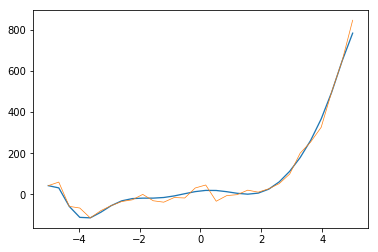

In [14]:
# Insert exception handling
def best_poly_fit(train_x, train_r, val_x, val_r, maxR=50):
    lowestCost = float("inf")
    bestK = bestW = -42
    for kSize in range(1, maxR):
        # Insert exception handling
        trainD = create_D_matrix(train_x, kSize)
        trainW = poly_fit(trainD, train_r)
        valD = create_D_matrix(val_x, kSize)
        currentCost = poly_cost(trainW, valD, val_r)

        if currentCost < lowestCost:
            lowestCost = currentCost
            bestK = kSize
            bestW = trainW

    return lowestCost, bestK, bestW


(bestCost, bestK, bestW) = best_poly_fit(givenXT, givenRT,
                                         givenXV, givenRV)

print("k =", bestK, ", cost =", bestCost)
print("Weights vector for that:")
print(bestW)
print("So g(x) =", np.asscalar(bestW[0]), "* x **", bestK,
      "+ ... +", np.asscalar(bestW[-1]))

poly_plot(bestW, pcol0, pcol1)